# Introduction to Artificial Neural Network with Keras

## Introduction

*Artificial Neural Networks* (ANNs) is a Machine Learning Model inspired by the networks of biological neurons found in our brains.

ANNs are the very core of Deep Learning. They are versatile, powerful, and scalable. They are able to tackle complex problems like classifying large number of images (Google Images), speech recognition services ("OK Google"), recommending movies (Netflix), etc.

We'll use popular Keras API: this is a beautifully designed and simple high-level API for building, training, evaluating, and running neural networks. 

## History of ANNs

ANNs first introduced back in 1943 by Neurophysiologist Warren McCulloch and the mathematician Walter Pitts in their paper "A Logical Calculus of Ideas Immanent in Nervous Activity".

In 1960, idea of making intelligent machines seems impossible (for quite a while), ANNs entered a long winter.

In early 1980, new architectures were build, interest rises in *connectionism* (the study of neural networks), progress was slow. And around 1990, more powerful Machine Learning Algorithms was built like SVMs. So they put on hold again.

But now we see that ANNs are rising and this time they keep rising. Here are few reasons why:

- Huge quantity of data available.
- Increase in Computing powers, and thanks to Gaming industry to give us GPU.
- Training algorithms have been improved.
- More funding in building amazing products and research.

## Logical Computations with Neurons

McCulloch and Pitts proposed a very simple model of the biological neuron, which later became known as *artificial neuron*: it has one or more binary inputs and one binary output. The artificial neuron activates its output when more than a certain number of its inputs are active. 

You can compute complex logical expressions by changing the inputs or combining them.

## The Perceptron

The *Perceptron* is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on slightly different artificial neuron called a *threshold logic unit* (TLU), or sometimes a *linear threshold unit* (LTU).

The inputs and output are numbers, and each connection holds some value called *weights*. The TLU computes a weighted sum of its inputs:
$$
z = w_1x_1 + w_2x_2 + ... + w_nx_n = X^TW
$$
 Then applies a *step function* and results an output:
$$
h_w(X) = step(z), where\ z = X^TW
$$
The most common step function used in Perceptron is the *Heaviside step function*:
$$
heaviside(z) = \{{0, if\ z < 0 \\ 1, if z >= 0}
$$
Sometimes a sign function:
$$
sign(z) = \{{-1, if\ z < 0 \\ 0, if\ z = 0 \\ 1, if\ z > 0}
$$
A single TLU can be use for simple linear binary classification. Training a TLU means finding the right values of weights.

A Perceptron is simply composed of a single layer of TLUs, with each TLU connected to all the inputs.

When all the neurons in a layer are connected to every neuron in previous layer, the layer is called *fully connected layer* or *dense layer*.

The inputs of Perceptron are simply passthrough neurons called *input neurons*: they output whatever they are fed. All the input neurons form the *input layer*. Moreover, an extra bias feature is added: represented as a *bias neuron*, always outputs 1. 

Computing the outputs of a fully connected layer:
$$
h_{W, b} = \phi(XW + b)
$$
 In this equation,

- **X**: inputs matrix
- **W**: weights matrix
- **b**: bias
- $\phi$: it represents *activation function*

The training of Perceptron was largely inspired by *Hebb's rule*: which is summarized as "cells that fire together, wire together"; that is connection weights between two neurons tends to increase when they activates together.

The Perceptron trains with slight different variant that takes into account of error made by the network. It reinforces the connection when it makes an error. The rule is:
$$
w_{i,j}^{(next\ step)} = w_{i, j} + \eta(y_j - \hat y_j)x_i
$$
In this equation:

- $w_{i,j}$ is the connection weight between the $i^{th}$ input neuron and the $j^{th}$ output neuron.
- $x_i$ is the $i^{th}$ input value of current training instance.
- $y_j$ is the target output of the $j^{th}$ output neuron.
- $\hat y_j$ is the output of the $j^{th}$ output neuron.
- $\eta$ is the learning rate.

The decision boundary of the TLUs are linear, so Perceptron are incapable of learning complex patterns. Overall this algorithm is called *Perceptron convergence theorem*.

You can use Sklearn's `Perceptron` to do this. However, it is same as the SGD classifier of Sklearn with hyperparameters `loss="perceptron", learning rate="constant"`.

Perceptrons do not output a class probability as Logistic regression. Rather, they output a hard threshold.

In 1969 monograph *Perceptrons*, there are weakness of Perceptrons like it cannot solve XOR problem. 

It turns out limitations of Perceptron can be replaced by stacking multiple Perceptrons. The resulting ANN is called *Multilayer Perceptron* (MLP). An MLP can solve XOR problem easily.


## Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length and width
y = (iris.target == 0).astype(np.int) # Iris setosa?

In [3]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [4]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

## Multilayer Perceptron and Backpropagation

A MLP is composed of one (passthrough) *input layer*, one or more layers of TLUs, called *hidden layers*, and one final layer of TLUs called the *output layer*. 

The layers close to input layer are usually called *lower layers*, and one close to output layer called *upper layers*.

Every layer except output layer includes the bias neuron and is fully connected to the next layer.

> The signal flows only in one direction (from the inputs to the outputs), so this architecture called *feedforward neural network* (FNN).

When an ANN contains deep stack of hidden layers, it is called *deep neural networks* (DNN). 

In 1986, David Rumelhart, Geoffrey Hinton, and Ronald Williams published a paper that introduces the *backpropagation*. Which is ground breaking and still in use. In short it is Gradient Descent using an efficient way to calculate gradients automatically.

> Automatically computing gradients is called *automatic differentiation*, or *autodiff*. The autodiff technique used in backpropagation is called *reverse-mode autodiff*. It is fast and precise, and well suited for when function to differentiate has many variables (e.g. connection weights) and few outputs (e.g. loss).

Backpropagation Algorithm:

- It handles one mini-batch at a time, and it goes through full training set multiple times. Each pass though full training set is called an *epoch*.
- Each mini-batch is passed through the network from input layer through hidden layers to the output layer, this is called *forward pass*. The results for every layer is preserved in order to compute gradients.
- Next, algorithm measures the network's output error (by loss function).
- Then it computes how much each output connection contributed to the error analytically by applying chain rule.
- Then it measures how much of these error contributions came from each connection in the layer below, again using chain rule, working backward until the algo reaches to the input layer. This is called *backward pass*.
- Finally, the algorithm performs Gradient Descent step to tweak all the connection weights in the network, using error gradients it just computed.

> It is important to initialize all the hidden layers' connection weights randomly, or else training will fall. For example, if you initialize all weights and bias to zero, then all neurons in a given layer will be perfectly identical, and backpropagation will affect them in a same way, so they will remain identical. Network treat a layer as only one neuron. If you initialize the weights randomly, you *break the symmetry* and allow backpropagation to train a diverse team of neurons.

In order to work this algorithm properly, there is a key change in MLP: they replaced the step function (non-differentiable) to the logistic (sigmoid) function,
$$
\sigma(z) = 1 / (1 + \exp(-z))
$$
Sigmoid is differentiable and ranges from 0 to 1. There are others we can use:

- *Hyperbolic tangent function*: $\tanh(z) = 2\sigma(2z)-1$
  - It is like sigmoid, but ranges from -1 to 1. Which make layer's output more centered around 0 at the beginning of training, which often helps speed up convergence.
- *The Rectified Linear Unit function*: $ReLU(z) = \max(0, z)$
  - It is continuous but not differentiable at 0. But in practice it works well and computed very fast, which makes it default for today's architectures. It's derivative is 0 for z < 0 and has no upper limit which makes it more usable.

We need activation functions because if we chain linear transformations we get a linear transformation. So if you don't have non-linearity between layers, then deep networks is equivalent to single layer network.

## Regression MLPs

We can use MLPs for regression tasks. To predict single values, you just need an output neuron, and for multivariate regression, you need one output neuron for every dimension (value).

In general, you don't need any activation function for the output layer. If you want positive output then you can use ReLU or *softplus function*, which is smooth variant of ReLU: $softplus(z) = \log(1 + \exp(z))$.

Finally, if you want output in a specific range, you could use sigmoid or tanh and scale it up to your specific range.

The loss function is generally mean squared error. But if you have lots of outliers you could use mean absolute error. Alternatively, you can use the *Huber loss*, which is combination of both.

> Huber loss is quadratic when error is smaller than a threshold $\delta$ (typically 1) but linear when greater.

## Classification MLPs

They mostly used in classification tasks. For a binary classification, you can use an output neuron with logistic function. The output will be in range 0 and 1, also gives you probability of 1 (positive class).

MLPs can also easily handle multilabel binary classification. You can use two neurons with logistic function if you have 2 labels. The probability of both does not add up to 1, means label are independent.

If your labels are dependent (e.g. MNIST), then you use output neuron for each label and apply *softmax function* to whole output layer, which produce a probabilities which add up to 1. This is called multiclass classification.

For loss, since we are pretending the output is probability distribution, the *cross-entropy loss* (also called the log loss) is generally a good choice.

## Implementing MLPs with Keras
We'll be using Keras, which is a Deep Learning API that allows you to easily build, train, evaluate, and execute all types of neural networks. It was developed Francois Chollet as part of a research project, and it made open source in March 2015.

Tensorflow is a framework that multi functionality to perform Deep Learning, Tensorflow 2 has made Keras as its official API.
### Buildind an Image Classifier using the Sequential API
Install tensorflow and check the versions

In [5]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.4.1'

In [6]:
keras.__version__

'2.4.0'

#### Using Keras to load the dataset
Keras provides some utility functions to fetch and load common datasets. Let's use Fashion MNIST, it is similar to MNIST but contain cloth images instead of digits.

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Keras' Fashion MNIST gives 28x28 array for each image, type as integers, and ranges from 0 to 255 as pixel intensities. 

In [8]:
X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
X_train_full.dtype

dtype('uint8')

It already splits dataset into train and test, but not validation set. We'll use Gradient Descent so we must scale input features by dividing them by 255.0. Now, numbers are in range 0-1 and become float.

In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

For Fashion MNIST, we need the list of class names to know the labels.

In [11]:
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", 
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

#### Creating the Model using the Sequential API

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

Let's go though code:

- `Sequential` model is the simplest Keras model to compose a single stack of layers connected sequentially.
- Next, the first layer added to the model. It is a `Flatten` layer, whose role is to convert input shape as 1D array. It does not accept any parameters, since it is first layer you need to pass `input_shape`. Alternatively, you could add `keras.layers.InputLayer` with passing `input_shape=[28, 28]`.
- Next, we add a `Dense` layer with 300 neuron number passing to it. It has an activation function ReLU. It manages all weights and bias when receives inputs.

- Then we add another `Dense` layer with 100 neurons and activation as ReLU.
- Finally, we add a `Dense` output layer with 10 neurons (one per class), using the softmax activation function.

> Specifying `activation='relu'` is equivalent to `activation=keras.activations.relu`.

Instead of adding layers one by one, you could pass a list of layers when creating th `Sequential` model.

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

The model's `summary()` method displays all the model's layers, including their name (which automatically created if not mentioned), output shape and number of parameters with total parameters, trainable and non-trainable parameter numbers.

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


However, you can use `keras.utils.plot_model()` to generate an image of your model.

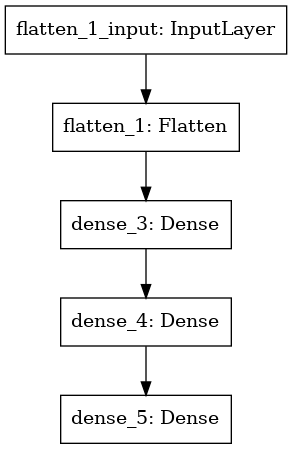

In [16]:
keras.utils.plot_model(model)

Note that, `Dense` layer has lot of parameters. This gives the model a lot of flexibility to fit the data, but it also means that model could overfit the data. Specially when you don't have lots of data.

You can easily get a list of layers.

In [17]:
model.layers

In [18]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [19]:
model.get_layer('dense_3') is hidden1

True

All the parameters can be accessed by `get_weights()` and `set_weights()` methods.

In [20]:
weights, bias = hidden1.get_weights()
weights, bias

(array([[ 0.04912871,  0.04384769,  0.02560204, ...,  0.046463  ,
         -0.02678521,  0.05448133],
        [-0.00158947,  0.06611165,  0.04448956, ..., -0.06629839,
          0.02476004,  0.04791243],
        [ 0.05714533, -0.03431037,  0.06473538, ..., -0.06917706,
         -0.05045783,  0.05423996],
        ...,
        [-0.03091257, -0.05223415,  0.01647809, ...,  0.0170871 ,
          0.05459966,  0.07111338],
        [ 0.02688216, -0.04065789,  0.01691267, ..., -0.04013266,
         -0.05917837,  0.03159022],
        [ 0.0295588 , -0.03157217, -0.00555795, ..., -0.0495863 ,
          0.00682347, -0.05790778]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [21]:
weights.shape, bias.shape

((784, 300), (300,))

`Dense` layer initialize the connection weights randomly, and biases to zeros. If you want to change initialization, you can set `kernel_initializer` (kernel is another name of matrix of connection weights) or `bias_initializer` when creating the layer.

> The shape of the weigthts matrix depends on the input shape. That's why we need to specify input shape at start. But if you don't that's okay Keras will wait until you pass it the data or you can call its `build()` mehod. 



#### Compiling the Model
After a model is created, you must call its `compile()` method to specify loss and optimizer, optionally you can specify some metrics to compute during training and evaluation.

In [22]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

> Using `loss='sparse_categorical_crossentropy'` is equivalent to `loss=keras.losses.sparse_categorical_crossentropy`, same goes for optimizers and metrics.

We use `sparse_categorical_crossentropy` loss because we have sparse labels (i.e. for each instances, there is just a target class index, from 0 to 9). If we had one-hot vectors then we'll use `categorical_crossentropy` loss instead. If we were doing binary classification binary classification, then we should use `sigmoid` activation function in the output layer, and we would use the `binary_crossentropy` loss.

> If you want to convert sparse labels to one-hot vector labels, use `keras.utils.to_categorical()` function. To go other way around, use the `np.argmax()` function with `axis=1`.

For optimizer `"sgd"` means that we will train model using simple Stochastic Gradient Descent.

> When using SGD optimizer, it is important to tune the learning rate. So, you will generally want to use `optimizer=keras.optimizers.SGD(lr=???)` to set the learning rate, which defaults to `lr=0.01`

Finally, metrics is `"accuracy"` which is calculated during training and evaluation.

#### Training and evaluating the Model

For this we simply call its `fit()` method.

In [23]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9788 - accuracy: 0.6928 - val_loss: 0.5161 - val_accuracy: 0.8250
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5041 - accuracy: 0.8235 - val_loss: 0.4505 - val_accuracy: 0.8456
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4506 - accuracy: 0.8450 - val_loss: 0.4417 - val_accuracy: 0.8472
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4277 - accuracy: 0.8518 - val_loss: 0.4075 - val_accuracy: 0.8612
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4012 - accuracy: 0.8594 - val_loss: 0.3708 - val_accuracy: 0.8702
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3836 - accuracy: 0.8665 - val_loss: 0.3684 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3727 - accuracy: 0.8710 - val_loss: 0.3668 - val_accuracy:

We pass it the input features (X_train) and the target classes (y_train), as well as number of epochs to train (defaults to 1).  We also pass it validation set (which is optional), Keras will measure the loss and other metrics on this set at the end of each epoch, which is very helpful to see. 

If performance on training set is much better than on the validation set, your model is probably overfitting the training set.

> Instead of passing a validation set, you could set `validation_split` to the ratio you want. For example, `validation_split=0.1` last 10% of training data will be used for validation.

If training set was very skewed, with some classes being over-represented than other, you could use `class_weight` argument in `fit()`, this would give extra weight to under-represented class while calculating the loss. If you need per-instance weights, use `sample_weight` argument, it would be useful if some instances were labeled by experts while other labeled by crowdsourcing platform: it gives more weight to the expert ones. You can also pass sample weight (not class weight) in `validation_data` tuple as third argument.

The `fit()` method returns a `history` object which contains the training parameters (`history.params`), the list of epochs (`history.epoch`), and most important dictionary (`history.history`) containing loss and extra metrics it measured. You could plot history using pandas `DataFrame` to get learning curves.



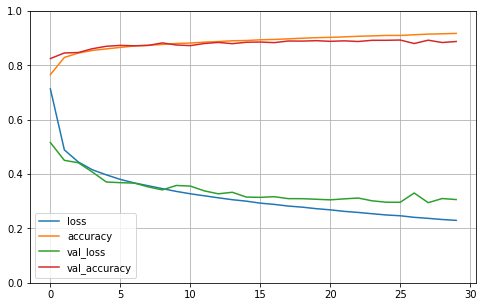

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Here you would see that training and validation curves are close which is good. At first, it seems validation is good because validation error is computed at the end of epoch and training loss is computed during each epoch. So training curve should be shifted half the epoch to the left. Then you see overlapping curves at the start.

> When plotting training curves, it should be shifted by half an epoch to the left.

If you want to train longer you can call `fit()` method and Keras will continue the training.

If you didn't satisfy with the training try tuning the hyperparameters. The first one to check is learning rate, then optimizer, then model's hyperparameters such as number of layers, number of neurons, and activation functions. You could also tune batch size (which can be set in `fit()` method as `batch_size` argument, defaults to 32) and number of epochs.

Now, it's time to evaluate model on the test set to see the generalization error.



In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 67.4871 - accuracy: 0.8464


[67.48709106445312, 0.8464000225067139]

Generally, test set performance is slightly lower than validation set, because the hyperparameters tuned on validation set. And do not try to tune hyperparameters on the test set.

#### Using the Model to make predictions

Next, we can use model `predict()` method for predictions.

In [26]:
X_new = X_test[:3]
y_probs = model.predict(X_new)
y_probs.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

This will give you probabilities for each class. If you only want class then you can use `np.argmax()` method with `axis=-1`.

> Use  `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification (e.g. if it uses a `softmax` last-layer activation).`(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

In [27]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Building a Regression MLP Using the Sequential API

Let's do some linear regression using neural networks. We'll use Sklearn's `fetch_california_housing()` dataset, and do some preprocessing.

In [29]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Now, we use Sequential API to build, train, evaluate, and use a MLP regression model for predictions. The output layer has a single neuron to predict a value and has no activation function, and the mean squared error as loss function.

In [32]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_val, y_val))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.5185 - val_loss: 0.7275
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5120 - val_loss: 1.0048
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5149 - val_loss: 0.4789
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4514 - val_loss: 0.4279
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4196 - val_loss: 0.4219
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4180 - val_loss: 0.4077
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4144 - val_loss: 0.4079
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4087 - val_loss: 0.4025
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4116 - val_loss: 0.3958
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3963 - val_loss: 0.4041

array([[1.3543502],
       [2.358878 ],
       [2.979795 ]], dtype=float32)

Sequential API is quit easy and common, but sometimes we need to build more complex architectures like with multiple inputs or outputs. For this purpose, Keras offers a *Functional API*.

### Building Complex Models using Functional API

One example of non-sequential neural network is *Wide & Deep* neural networks. It connects all or part of the inputs to the outputs, which helps to learn both deep patterns (using deep path) and simple patterns (using short path).

Let's build such a neural network:  

In [34]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

Let's go through this code:

- First, we need to create an `Input` object. Which specifies the input kind to the model.
- Next, we create a normal `Dense` layer. Notice, we call it like a function, passing it the input. This is why this is called Functional API. 
- Then we pass output of first hidden to another.
- Next, we create a `Concatenate` layer, we pass it the input and the output of second hidden layer. You may prefer `keras.layers.concatenate()` function.
- Then we create an output layer, passing in result of the concatenation.
- Lastly, we create a Keras `Model`, specifying which inputs and outputs to use.

After that all steps are same.

But what if you want to send a subset of the features through the wide path and different (possibly overlapping) to the deep path? Solution is to use multiple inputs. For example, suppose we want to pass five features through wide path (0 to 4), and six features to deep path (2 to 7):



In [36]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

The code is self-explanatory. You should name the important layers when model get complex. Now to call `fit()` you need to pass it a pair of input matrices `(X_train_A, X_train_B)`, one for each. This is true for each `X_val`, `X_test`, and `X_new` when you call `evaluate()` or `predict()`.

> Alternatively, you could pass a dictionary mapping the input names to the input matrices, like `{'wide_input': X_train_A, 'deep_input': X_train_B}`.



In [39]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_val_A, X_val_B = X_val[:, :5], X_val[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_val_A, X_val_B), y_val))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))
y_pred

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8572 - val_loss: 0.7481
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7085 - val_loss: 0.6687
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6769 - val_loss: 0.6286
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6332 - val_loss: 0.6040
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5996 - val_loss: 0.5833
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5887 - val_loss: 0.5682
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5803 - val_loss: 0.5557
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5824 - val_loss: 0.5372
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5430 - val_loss: 0.5251
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5495 - val_loss: 0.5156

array([[1.2014873],
       [2.6263332],
       [2.8611617]], dtype=float32)

There are many use cases when you may want multiple outputs:

- For object detection, you may want to locate (regression) and classify (classification) an object in a picture.
- If you have multiple independent tasks on the same data. Sure, you could train multiple neural networks for each task but training a single might get you better performance by learning across features. For example, you can perform *multitask classification*.
- One use case is used as regularization technique by adding some auxiliary outputs in a neural network architecture to ensure that the underlying part of the networks learn something useful.

Adding extra outputs is quite easy:

In [42]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

Each output will need its own loss function. Therefor, when we compile the model, we should pass a list of losses (or a dictionary mapping output names to losses). If we pass a single loss, Keras will assume same loss for all outputs. Keras will compute all these losses and add them up at last. Since, main outputs are more important than auxiliary ones, we can add weight to main output.

In [43]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

Now when we train the model it should expect labels for each output. In this example the labels are same, so instead of passing `y_train`, we need to pass `(y_train, y_train)` (and same goes for `y_val` and `y_test`).

In [44]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                   validation_data=([X_val_A, X_val_B], [y_val, y_val]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8999 - main_output_loss: 1.8001 - aux_output_loss: 2.7983 - val_loss: 0.6397 - val_main_output_loss: 0.5687 - val_aux_output_loss: 1.2792
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6024 - main_output_loss: 0.5430 - aux_output_loss: 1.1374 - val_loss: 0.7694 - val_main_output_loss: 0.7533 - val_aux_output_loss: 0.9142
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 1.0292 - main_output_loss: 1.0240 - aux_output_loss: 1.0760 - val_loss: 0.5203 - val_main_output_loss: 0.4884 - val_aux_output_loss: 0.8081
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4882 - main_output_loss: 0.4560 - aux_output_loss: 0.7778 - val_loss: 0.4756 - val_main_output_loss: 0.4542 - val_aux_output_loss: 0.6687
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4621 - main_output_loss: 0.4373 - aux_output_loss: 0.6854 - val_loss

When we evaluate the model, Keras will return total loss, as well as all the individual losses. Similarly, `predict()` will return predictions for each output.



In [46]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
y_pred_main, y_pred_aux

162/162 [==============================] - 0s 970us/step - loss: 0.3302 - main_output_loss: 0.3178 - aux_output_loss: 0.4414


(array([[1.1003531],
        [2.3739426],
        [2.8327956]], dtype=float32),
 array([[1.6497698],
        [2.5280735],
        [2.8457167]], dtype=float32))